## GPU vs CPU Performance using Tensorflow<br><br>

>**_Razer Blade Pro_**


> >`Hardware specification`:<br>

|Device|Maker|Model|
|:---:|:---:|:---:|
|**GPU**|_NVIDIA_|_GTX 765M_|
|**CPU**|_Intel_|_i7 2.4GHz_|
<br>
<br>
<br>
> >`Environment specification`:<br>

|Envs|Version|
|:---:|:---:|
|**OS**|_windows 7_|
|**Anaconda**|_conda 4.5.11_|
|**Python**|_python 3.6.5_|
|**CUDA**|_cuda 9.0_|
|**cuDNN**|_cuDNN 7.1.4_|
|**Tensorflow**|_tensorflow-gpu 1.9.0_|
<br>
<br>

In [1]:
import tensorflow as tf
import time

In [2]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

with tf.Session() as sess:
    result = sess.run(sum_result)   

In [3]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [4]:
size=500
with tf.device("/cpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [5]:
size=500
with tf.device("/gpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [6]:
def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size],name='W')
        X = tf.random_normal([size, size],name='X')
        mul = tf.matmul(W, X,name='mul')
        sum_result = tf.reduce_sum(mul,name='sum')

    startTime = time.time() 
    tfconfig=tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime   
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes

In [7]:
g=performanceTest("/gpu:0",100)
c=performanceTest("/cpu:0",100)

/gpu:0  size= 100 Time: 0.013000726699829102
/cpu:0  size= 100 Time: 0.013000726699829102


In [8]:
g=performanceTest("/gpu:0",1000)
c=performanceTest("/cpu:0",1000)

/gpu:0  size= 1000 Time: 0.02000117301940918
/cpu:0  size= 1000 Time: 0.052002906799316406


In [9]:
g=performanceTest("/gpu:0",5000)
c=performanceTest("/cpu:0",5000)

/gpu:0  size= 5000 Time: 0.4480254650115967
/cpu:0  size= 5000 Time: 2.042116641998291


In [10]:
g=performanceTest("/gpu:0",7000)
c=performanceTest("/cpu:0",7000)

/gpu:0  size= 7000 Time: 1.313075065612793
/cpu:0  size= 7000 Time: 5.126293420791626


In [11]:
g=performanceTest("/gpu:0",9000)
c=performanceTest("/cpu:0",9000)

/gpu:0  size= 9000 Time: 2.866163969039917
/cpu:0  size= 9000 Time: 10.867621660232544


In [12]:
#g=performanceTest("/gpu:0",10000)
#c=performanceTest("/cpu:0",10000)

GPU driver crashed!!!

#### Generate 0~9k matrix computations, print every 1000 computations.

In [13]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,8001,1000):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("--")

/gpu:0  size= 0 Time: 0.022001266479492188
/cpu:0  size= 0 Time: 0.016000747680664062
--
/gpu:0  size= 1000 Time: 0.020000934600830078
/cpu:0  size= 1000 Time: 0.054003238677978516
--
/gpu:0  size= 2000 Time: 0.047002553939819336
/cpu:0  size= 2000 Time: 0.19601130485534668
--
/gpu:0  size= 3000 Time: 0.1130061149597168
/cpu:0  size= 3000 Time: 0.5000286102294922
--
/gpu:0  size= 4000 Time: 0.23501348495483398
/cpu:0  size= 4000 Time: 1.1150634288787842
--
/gpu:0  size= 5000 Time: 0.47002673149108887
/cpu:0  size= 5000 Time: 2.033116340637207
--
/gpu:0  size= 6000 Time: 0.7220413684844971
/cpu:0  size= 6000 Time: 3.4141952991485596
--
/gpu:0  size= 7000 Time: 1.309074878692627
/cpu:0  size= 7000 Time: 5.20329737663269
--
/gpu:0  size= 8000 Time: 1.657094955444336
/cpu:0  size= 8000 Time: 7.885450839996338
--


#### Plot time consumer GPU vs CPU.

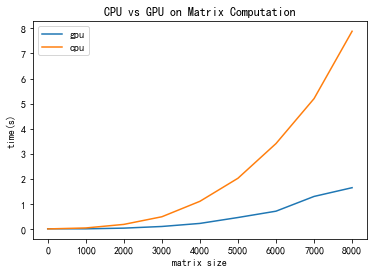

In [14]:
%matplotlib inline
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']

import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.title('CPU vs GPU on Matrix Computation')
plt.ylabel('time(s)')
plt.xlabel('matrix size')
plt.legend()